In [243]:
import string
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.neural_network import MLPClassifier
import nltk
import numpy as np
from sklearn.ensemble import RandomForestClassifier

In [244]:
DATA=pd.read_csv("Downloads/review.csv")
data=DATA[0:3000]

In [266]:
data.head()

,review_id,user_id,business_id,stars,useful,funny,cool,text,date
0,y9LjbrTVwjjGeF8B3OgBTA,7G5zDV-olQZTTWzWuSqotg,JuTlOfaUDnqnNEG8QYnYrw,2.0,0,0,0,"This restaurant was your typical ""hipster"" est...",2019-08-15 11:16:24
1,9c8fm0S8-sVf5bqJMWBYtg,d2-Ihy_voYANxuCMUenMgQ,d3OyBZ7BorkexfTdgcrTuA,5.0,0,0,0,Had them through Uber Eats and it was amazing!...,2020-12-07 23:52:30
2,GNhk56HTgPVkDRVJFRzfxQ,0PrV9wgHBnDwb71F-ZhMag,2sUwqyAICjFUnC4Iu_W3qQ,5.0,0,0,1,Just moved in around the corner and this place...,2019-01-08 20:38:33
3,T2WeI1ih7lMEe9jLT7e0Og,UFHsd6UReXizCd6Klb17Jg,6c7-aX7VUO1-royM4wfzOQ,5.0,0,0,0,"Simon, was awesome. Food was great and we real...",2019-03-24 18:48:46
4,tP-La1yqjvT_yrKhcMHksQ,XqpD3goWk-hoaUlOhcCsfA,6c7-aX7VUO1-royM4wfzOQ,1.0,0,0,0,Today was my first purchase with this overpric...,2020-02-26 04:10:16


In [245]:
data.columns

Index(['review_id', 'user_id', 'business_id', 'stars', 'useful', 'funny',
       'cool', 'text', 'date'],
      dtype='object')

In [246]:
print(data.shape)

(3000, 9)


In [248]:
def preprocess(text):
    remove_pctn =[char for char in text if char not in string.punctuation]
    remove_pctn=''.join(remove_pctn)
    lwr=[word.lower() for word in remove_pctn.split()]
    final_word=[word for word in lwr if word not in stopwords.words('english')]
    return final_word

In [249]:
filtered_data=data[(data['stars']== 1)| (data['stars']== 5)]
x=filtered_data['text']
y=filtered_data['stars']
vectorizer=CountVectorizer(analyzer=preprocess).fit(x)
x=vectorizer.transform(x)
X_train,X_test,y_train,y_test =train_test_split(x,y,random_state=42)

In [250]:
model=MLPClassifier()
model.fit(X_train,y_train)
y_predict=model.predict(X_test)

In [251]:
def conf_matrix(y,y_predict, reviews, title='Confusion_Matrix_MLP'):
    c_matrix=confusion_matrix(y,y_predict)
    ticks=np.arange(len(reviews))
    score=accuracy_score(y,y_predict)
    score =round(score *100,2)
    print("Accuracy_score:",score)
    print('classification_report',classification_report(y_test,y_predict))
    print(confusion_matrix(y_test,y_predict))
    sns.heatmap(c_matrix,cmap='PuBu',annot=True,fmt='g',annot_kws={'size':20})
    plt.xticks(ticks,reviews)
    plt.yticks(ticks,reviews)
    plt.xlabel('predicted',fontsize=20)
    plt.ylabel('actual',fontsize=20)
    plt.title(title,fontsize=20)
    plt.show()

Accuracy_score: 92.91
classification_report               precision    recall  f1-score   support

         1.0       0.92      0.79      0.85       106
         5.0       0.93      0.98      0.95       303

    accuracy                           0.93       409
   macro avg       0.93      0.88      0.90       409
weighted avg       0.93      0.93      0.93       409

[[ 84  22]
 [  7 296]]


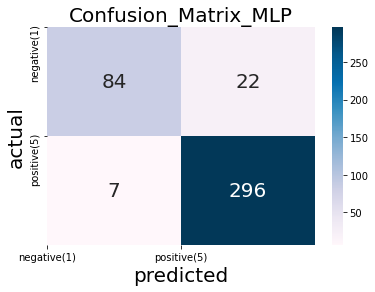

In [252]:
conf_matrix(y_test,y_predict,reviews=['negative(1)','positive(5)'])

In [273]:
model2=DecisionTreeClassifier()
model2.fit(X_train,y_train)
y_predict=model2.predict(X_test)

In [274]:
def conf_matrix2(y,y_predict, reviews, title='Confusion_Matrix_DT'):
    c_matrix2=confusion_matrix(y,y_predict)
#     clsfn_report =classification_report
    ticks=np.arange(len(reviews))
    score=accuracy_score(y,y_predict)
    score =round(score *100,2)
    print("Accuracy_score:",score)
    print('classification_report',classification_report(y_test,y_predict))
    print(confusion_matrix(y_test,y_predict))
    sns.heatmap(c_matrix2,cmap='PuBu',annot=True,fmt='g',annot_kws={'size':20})
    plt.xticks(ticks,reviews)
    plt.yticks(ticks,reviews)
    plt.xlabel('predicted',fontsize=20)
    plt.ylabel('actual',fontsize=20)
    plt.title(title,fontsize=20)
    plt.show()

Accuracy_score: 83.37
classification_report               precision    recall  f1-score   support

         1.0       0.72      0.58      0.65       106
         5.0       0.86      0.92      0.89       303

    accuracy                           0.83       409
   macro avg       0.79      0.75      0.77       409
weighted avg       0.83      0.83      0.83       409

[[ 62  44]
 [ 24 279]]


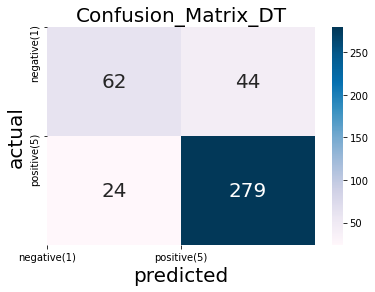

In [275]:
conf_matrix2(y_test,y_predict,reviews=['negative(1)','positive(5)'])

In [276]:
model3=RandomForestClassifier()
model3.fit(X_train,y_train)
y_predict=model3.predict(X_test)

In [277]:
def conf_matrix3(y,y_predict, reviews, title='Confusion_Matrix_RFC'):
    c_matrix3=confusion_matrix(y,y_predict)
#     clsfn_report =classification_report
    ticks=np.arange(len(reviews))
    score=accuracy_score(y,y_predict)
    score =round(score *100,2)
    print("Accuracy_score:",score)
    print('classification_report',classification_report(y_test,y_predict))
    print(confusion_matrix(y_test,y_predict))
    sns.heatmap(c_matrix3,cmap='PuBu',annot=True,fmt='g',annot_kws={'size':20})
    plt.xticks(ticks,reviews)
    plt.yticks(ticks,reviews)
    plt.xlabel('predicted',fontsize=20)
    plt.ylabel('actual',fontsize=20)
    plt.title(title,fontsize=20)
    plt.show()

Accuracy_score: 86.8
classification_report               precision    recall  f1-score   support

         1.0       0.96      0.51      0.67       106
         5.0       0.85      0.99      0.92       303

    accuracy                           0.87       409
   macro avg       0.91      0.75      0.79       409
weighted avg       0.88      0.87      0.85       409

[[ 54  52]
 [  2 301]]


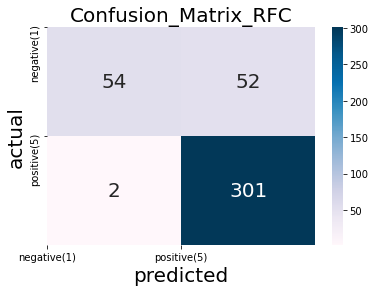

In [272]:
conf_matrix3(y_test,y_predict,reviews=['negative(1)','positive(5)'])

In [259]:
# Since multilayer perceptron classifier has the best score, 
# let us use it to predict a random positive review and a random negative review!

In [278]:
# POSITIVE REVIEW
positive_review = data['text'][1]
print(positive_review)
print("Actual Rating: ",data['stars'][1])
positive_review_p = vectorizer.transform([positive_review])
print("Predicted Rating:")
model.predict(positive_review_p)[0]

Had them through Uber Eats and it was amazing! We got the pork belly & meatball banh mi, it was so flavorful. We also got the macarons and millefeuille, perfect and light desserts to finish the meal. Don't understand the bad reviews, it's a great meal at a cheap price.
Actual Rating:  5.0
Predicted Rating:


5.0

In [279]:
# NEGATIVE REVIEW
negative_review = data['text'][200]
print(negative_review)
print("Actual Rating: ",data['stars'][200])
negative_review_n = vectorizer.transform([negative_review])
print("Predicted Rating:")
model.predict(negative_review_n)[0]

The drive thru is always long, and the staff just hands me their pin pad to insert my card, and then I always have to enter a pin. I'd rather run credit than debit, especially sitting in my car, lower than the window, and being outside of the building. Can you help me out here staff? I know you're following corporate standards for pin protection, but maybe you need to contest corporate policy for customer satisfaction. Other locations are swiping my card for me, why are you not? I hear, "we can't do that" or "its policy", and the famous, "well if you had the app"... that one pisses me off. 
You know what? An app will replace you with that response, and quite possibly a vending robot. Smile and swipe my card, I'm paying your salary.
Actual Rating:  1.0
Predicted Rating:


5.0

In [262]:
count = data['stars'].value_counts()
print(count)

5.0    1295
4.0     715
3.0     383
1.0     341
2.0     266
Name: stars, dtype: int64


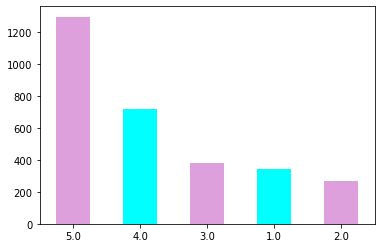

In [263]:
count.plot(kind='bar',rot=0,color=['plum','cyan']);